In [15]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
log_files = glob('../checkpoints/test_*/_log.csv')

def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip().lower() if isinstance(x, str) else x
    return df.applymap(trim_strings)

In [16]:
log_content = [pd.read_csv(log_file, header=None, names=['method', 'optimizer', 'n_epoch', 'epoch', 'error', 'psnr']) for log_file in log_files]
log_content = pd.concat(log_content)
log_content = trim_all_columns(log_content)
log_content.head()

,method,optimizer,n_epoch,epoch,error,psnr
0,sub,adam,500,1,0.708323,19.498603
1,sub,adam,500,2,0.009987,19.993859
2,sub,adam,500,3,0.009525,20.265873
3,sub,adam,500,4,0.008981,20.249028
4,sub,adam,500,5,0.008682,20.537871


[0, 6, 15, 25]

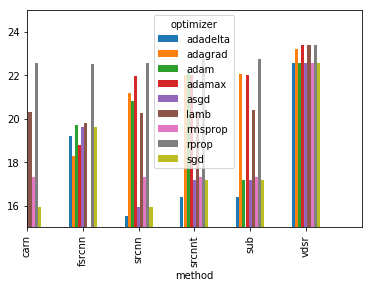

In [51]:
log_data = log_content.groupby(['method', 'optimizer']).mean().reset_index()
log_pivot = log_data.pivot("method","optimizer","psnr")
log_pivot.plot(kind='bar')

plt.axis([0, 6, 15, 25])

[0, 6, 0, 0.18]

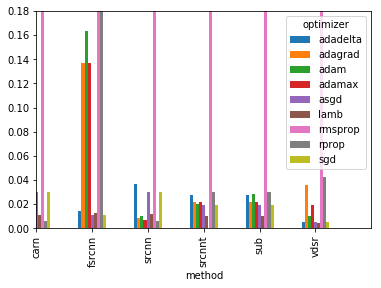

In [49]:
log_data = log_content.groupby(['method', 'optimizer']).mean().reset_index()
log_pivot = log_data.pivot("method","optimizer","error")
log_pivot.plot(kind='bar')

plt.axis([0, 6, 0, 0.18])

[0, 9, 15, 25]

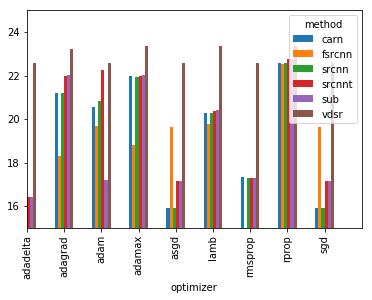

In [44]:
log_data = log_content.groupby(['method', 'optimizer']).mean().reset_index()
log_pivot = log_data.pivot("optimizer","method","psnr")
log_pivot.plot(kind='bar')

plt.axis([0, 9, 15, 25])

[0, 9, 0, 0.18]

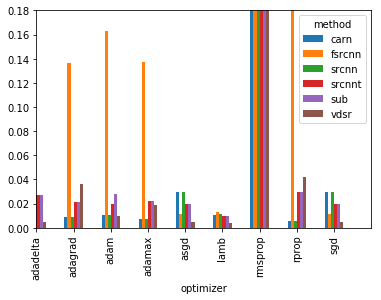

In [46]:
log_data = log_content.groupby(['method', 'optimizer']).mean().reset_index()
log_pivot = log_data.pivot("optimizer","method","error")
log_pivot.plot(kind='bar')

plt.axis([0, 9, 0, 0.18])